## IBM DATA ANALYST CAPSTONE PROJECT WEEK 3: EXPLORATORY DATA ANALYSIS

#### THIS JUPYTER NOTEBOOK WAS CREATED IN VISUAL STUDIO TO DISPLAY THE WORK I MADE AS PART OF THE IBM DATA ANALYST CAPSTONE PROJECT.


### Hands on Lab


In [1]:
import pandas as pd #import the pandas

#Load the dataset into a dataframe.
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

### Distribution: determine how the data is distributed

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.



In [2]:
#first install matplotlib & seaborn libraries if they are not already built-in.
!py -m pip install "matplotlib"
!py -m pip install "seaborn"


C:\Users\YEMI YEMI\AppData\Local\Temp\ipykernel_4372\3229779796.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)


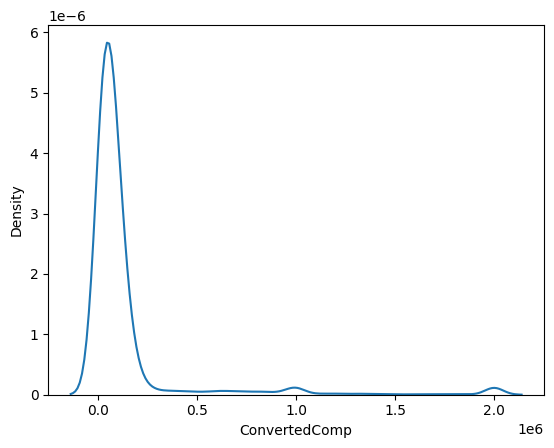

In [3]:
#Then import the libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Create a distribution plot using seaborn
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)

plt.show()  #display the distribution plot.

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot: ylabel='Frequency'>

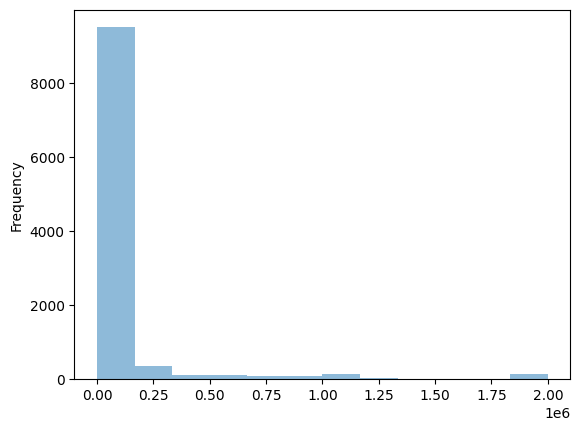

In [4]:
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)   #The plot() function is used to draw points (markers) in a diagram.
                                                    #By default, the plot() function draws a line from point to point.
                                                    #The function takes parameters for specifying points in the diagram.
                            #bins mean the no of histogram bins to be used.
                            #alpha is used to adjust the transparency of the graph plot. alpha = 1 by default.
                            #alpha < 1 makes the graph more transparent, > 1 reduces the transparency.

What is the median of the column `ConvertedComp`?


In [5]:
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [7]:
print((df['Gender'].eq('Man').sum()), 'respondents')

10480 respondents


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?

min,q1,median,q3,max of a column are its five number summary.

In [9]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot: ylabel='Frequency'>

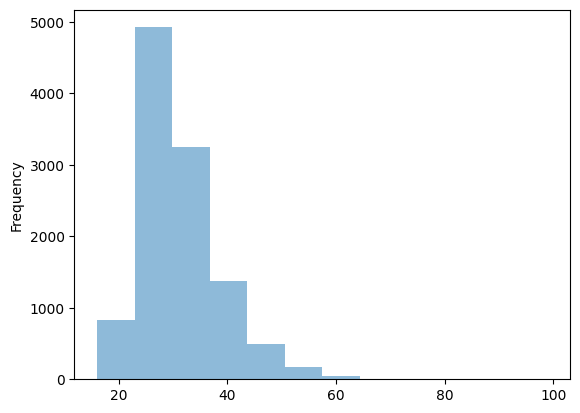

In [10]:
df['Age'].plot.hist(bins=12, alpha=0.5)    #

#### Outliers
Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot: xlabel='ConvertedComp'>

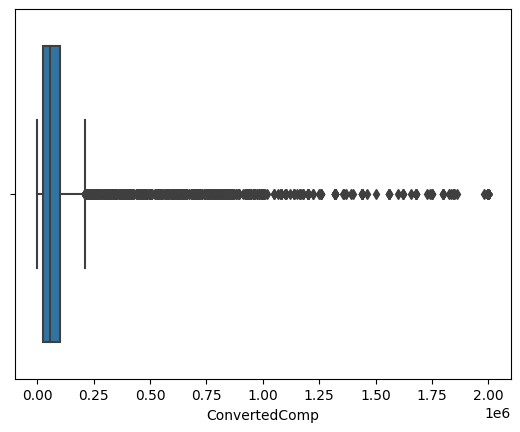

In [11]:
sns.boxplot(x=df["ConvertedComp"])

In [12]:
#Find out the Inter Quartile Range for the column 'ConvertedComp'.
df['ConvertedComp'].describe()


count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [13]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('Interquartile range is', IQR)

Interquartile range is 73132.0


In [14]:
#Find out the upper and lower bounds.
Q4 = df['ConvertedComp'].quantile(1)
print('upper bound is', Q1)
print('lower bound is', Q4)

upper bound is 26868.0
lower bound is 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
Outliers_below_1stQ = df['ConvertedComp'] < (Q1 - 1.5*IQR).sum()
Outliers_above_3rdQ = df['ConvertedComp'] > (Q3 + 1.5*IQR).sum()

print(Outliers_below_1stQ)
print(Outliers_above_3rdQ)

0        False
1        False
2        False
3        False
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool
0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
df['ConvertedComp'].shape

(11398,)

In [17]:
#removing the 1st set of outliers.
df1 = df[~(Outliers_below_1stQ)]    #Tilde sign (~) in pandas is used to work with Boolean values (True/False). 
                                    #It works as a negation operator i.e. it reverses the Boolean values.
                                    #If we assign a tilde sign before any statement which is supposed to return True then this tilde sign converts True to False and vice versa.
df1.shape

(11398, 85)

In [18]:
df1.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [19]:
#removing the 2nd set of outliers.
df2 = df[~(Outliers_above_3rdQ)]
df2.shape


(10519, 85)

In [20]:
df2.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


### Correlation
Find the correlation between `Age` and all other numerical columns.


In [21]:
df.corr()['Age']

C:\Users\YEMI YEMI\AppData\Local\Temp\ipykernel_4372\114884634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Age']


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors
Ramesh Sannareddy
### Other Contributors
Raj Ahuja




## Change Log

| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
